In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [55]:
np.random.seed(123)

#Tipos de predicciones:
#Regresion es continuo
#Clasificacion es categorico

**1 Objetivo:** Predecir si una persona va a tener un ataque al

**2 Objetivo:** Conseguir los datos

In [56]:
df = pd.read_csv("/content/Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**3 Objetivo:** Dividir los datos en entrenamiento y pruebas

In [57]:
train, test = train_test_split(df, test_size=0.3)

In [58]:
#Tabla de contingencia
#P(AHD = yES / sEX = 1) = 78/143 = 0.54
#P(AHD = yES / sEX = 0) = 21/69 = 0.30

crosstab = pd.crosstab(train['Sex'], train['AHD'], margins = True)
crosstab

AHD,No,Yes,All
Sex,,,
0,48,21,69
1,65,78,143
All,113,99,212


In [59]:
#Variables que se comprenden Age, Sex, ChestPain, Chol (Colesterol), MaxHR (Maximas palpitaciones por min), ExAng (Dolor despues de ahcer ejercicio) y AHD
dfII = train[{'Age','Sex','ChestPain','Chol','MaxHR','ExAng','AHD'}]

#No hay datos null entonces se procede a hacer un escalamiento
dfII_Num = dfII[['Age','Sex','Chol','MaxHR','ExAng']]
ESC_MIN = MinMaxScaler()
minmax_scaler = ESC_MIN.fit_transform(dfII_Num)

dfII_Cat_ORD = dfII[['ChestPain']]
dfII_Cat_ONHT = dfII['AHD']
ORD_ENC = OrdinalEncoder()
ordinal_encoded_data = ORD_ENC.fit_transform(dfII_Cat_ORD)
ONHT_ENC = OneHotEncoder(sparse=False)
dfII_Cat_ONHT_reshaped = dfII_Cat_ONHT.to_numpy().reshape(-1, 1)
onehot_encoded_data = ONHT_ENC.fit_transform(dfII_Cat_ONHT_reshaped)

pipeline_numerico =\
   Pipeline(
      [
        ('Escalador', MinMaxScaler()), # Escalar los datos con MinMaxS
      ]
   )
pipeline_categorico =\
   Pipeline(
      [
        ('EscaladorOHT', OneHotEncoder(sparse=False)), #Escalar con OneHot
      ]
   )
pipeline_categorico_2 =\
   Pipeline(
      [
        ('EscaladorORD', OrdinalEncoder()) #Escalar con Oridnal
      ]
   )

transformer = ColumnTransformer(
  [
      ('Numerico',pipeline_numerico, [1,2,3,5,6]),
      #('Categorico_1',pipeline_categorico, [5]),
      #('Categorico_2',pipeline_categorico_2, [1])
  ]
)

transformer.fit(dfII)
dfIII = transformer.transform(dfII)

dfIV = pd.DataFrame(dfIII)
dfV = dfIV.rename(columns={0: 'MaxHR', 1: 'Sex', 2: 'Age', 3: 'Chol', 4: 'ExAng'})
dfV = pd.merge(dfV, dfII_Cat_ONHT, left_index=True, right_index=True)
dfV

<ipython-input-59-506a990e4e2b>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfII = train[{'Age','Sex','ChestPain','Chol','MaxHR','ExAng','AHD'}]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,MaxHR,Sex,Age,Chol,ExAng,AHD
0,1.0,0.872340,1.0,0.150943,0.318707,No
1,1.0,0.000000,0.0,1.000000,0.168591,Yes
2,1.0,0.872340,1.0,0.273585,0.099307,Yes
3,0.0,0.617021,1.0,0.471698,0.217090,No
4,1.0,0.489362,0.0,0.688679,0.212471,No
...,...,...,...,...,...,...
207,1.0,0.638298,1.0,0.622642,0.106236,Yes
208,1.0,0.829787,1.0,0.509434,0.330254,No
209,1.0,0.531915,0.0,0.603774,0.249423,Yes
210,0.0,0.489362,0.0,0.688679,0.150115,No


<Axes: ylabel='Count'>

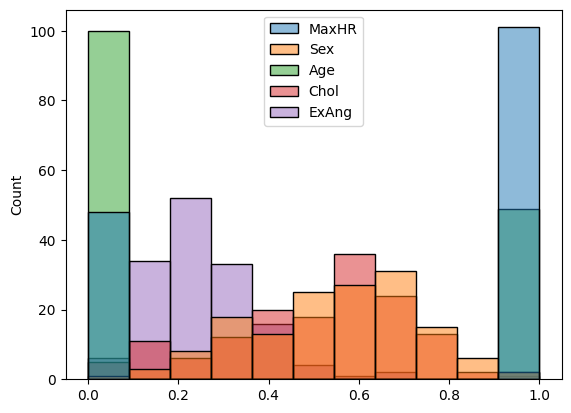

In [60]:
sns.histplot(data=dfV)


<Axes: xlabel='MaxHR', ylabel='Count'>

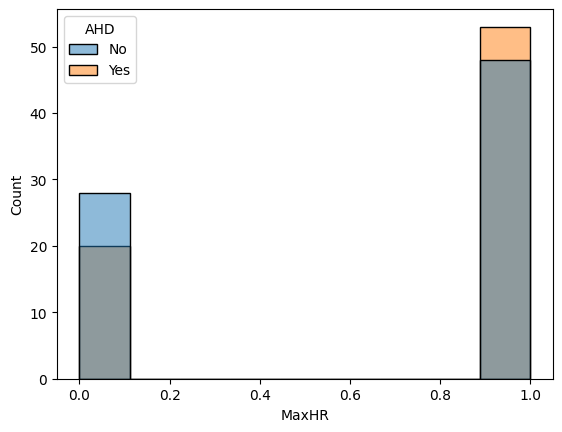

In [61]:
sns.histplot(x=dfV.columns[0], hue="AHD", data=dfV)

<Axes: xlabel='Sex', ylabel='Count'>

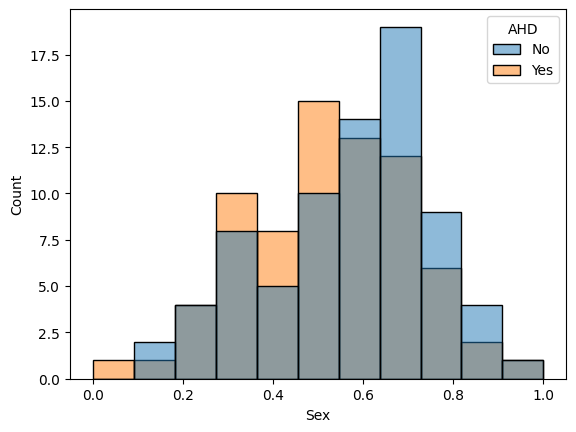

In [62]:
sns.histplot(x=dfV.columns[1], hue="AHD", data=dfV)

<Axes: xlabel='Age', ylabel='Count'>

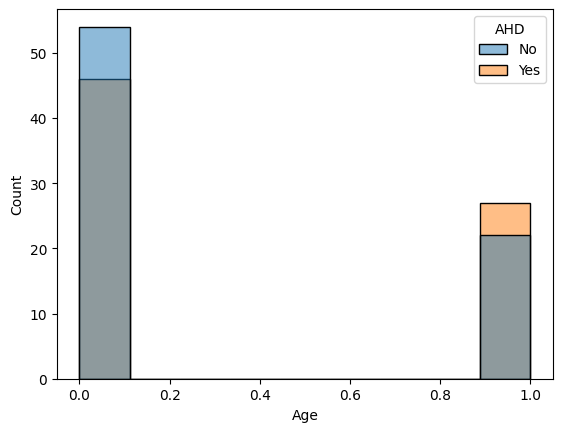

In [63]:
sns.histplot(x=dfV.columns[2], hue="AHD", data=dfV)

<Axes: xlabel='Chol', ylabel='Count'>

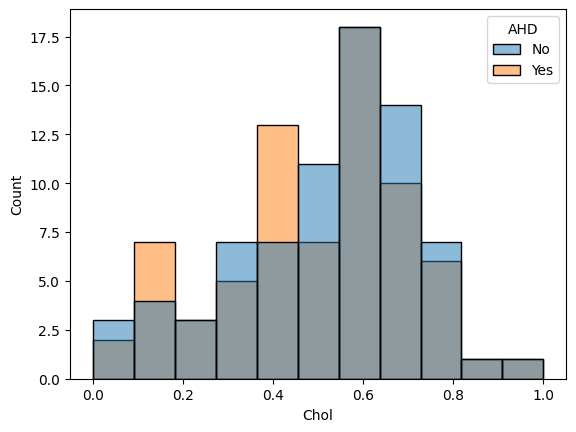

In [64]:
sns.histplot(x=dfV.columns[3], hue="AHD", data=dfV)

<Axes: xlabel='ExAng', ylabel='Count'>

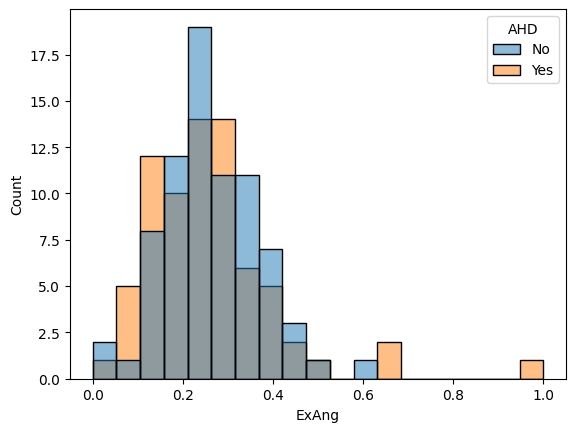

In [65]:
sns.histplot(x=dfV.columns[4], hue="AHD", data=dfV)

### **Analisis de la clase**
**Numerica contra numerica:** hacer scatter y buscar el coef de corr.

**Categorica vs numerica:** hacer histograma y se comparan mean y std o hacer el boxplot comparar median y los rangogos intercuartilicos.

**Categorica vs categorica:** hacer una tabla de contingencia y comaprar probabilidad.


In [66]:
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("/content/Heart.csv", index_col=0)

train, test = train_test_split(df ,test_size=0.3 ,random_state=123)

train = train.dropna()

X_train = train[["Age","Sex","Chol"]] #Metemos todas las variables excepto AHD
y_train = (train["AHD"]=="Yes").astype("int") #Lo que se quiere predecir

In [67]:
X_train = X_train.dropna()

In [78]:
model = DecisionTreeClassifier(max_depth=3)
#Cuando se cambia el argumento va cambiando los datos, buscamos que ambos resultados sean parecidos.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [79]:
model.predict([[21,0,80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [80]:
model.predict_proba([[50,0,80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [81]:
X_train

,Age,Sex,Chol
171,70,1,269
133,29,1,204
137,70,1,174
287,58,0,225
152,42,0,265
...,...,...,...
107,59,1,177
84,68,1,274
18,54,1,239
231,52,0,196


In [82]:
X_test = test[["Age","Sex","Chol"]]
y_test = (test["AHD"]=="Yes").astype("int")

In [83]:
y_test

12     0
293    1
270    0
269    1
95     0
      ..
263    0
8      0
163    0
264    0
232    1
Name: AHD, Length: 91, dtype: int64

In [74]:
model.predict([[56,0,294]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [84]:
#Porcetaje de aciertos de el modelo
from sklearn.metrics import accuracy_score

#A VECES ESTE MODELO DA MAL AUN CON LOS DATOS CON LOS QUE SE ENTRENO, ESTO QUIERE DECIR QUE NO SE PUEDE PREDECIR
accuracy_score(y_train, model.predict(X_train)) * 100

accuracy_score(y_test, model.predict(X_test)) * 100

#Cuando supera la referencia que se tiene, el modelo esta bien (Ej: Si nuestro modelo se equivoca menos dque un medico)

60.43956043956044

In [ ]:
#Tarea: